# **[OK]**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

data = pd.read_csv('../../data/nama-gender-titik.csv', sep=";")
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'f' else 0)
names = data[['name', 'gender']].values.tolist()

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

In [2]:
x_train = np.array([name_to_vector(name[0]) for name in names])
y_train = np.array([name[1] for name in names])

In [3]:
# Defining the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(29,)))
model.add(tf.keras.layers.Embedding(input_dim=27, output_dim=64, input_length=29))
model.add(tf.keras.layers.LSTM(32, return_sequences=True))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [4]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])

In [5]:
hist = model.fit(x_train, y_train, validation_data=(x_train, y_train), epochs=20, batch_size=128)

Epoch 1/20


2023-04-24 02:04:10.340221: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4877/4877 [==============================] - 168s 34ms/step - loss: 0.2900 - accuracy: 0.8695 - val_loss: 0.1887 - val_accuracy: 0.9232
Epoch 2/20
4877/4877 [==============================] - 164s 34ms/step - loss: 0.1722 - accuracy: 0.9306 - val_loss: 0.1599 - val_accuracy: 0.9371
Epoch 3/20
4877/4877 [==============================] - 166s 34ms/step - loss: 0.1462 - accuracy: 0.9421 - val_loss: 0.1364 - val_accuracy: 0.9466
Epoch 4/20
4877/4877 [==============================] - 167s 34ms/step - loss: 0.1327 - accuracy: 0.9478 - val_loss: 0.1264 - val_accuracy: 0.9498
Epoch 5/20
4877/4877 [==============================] - 166s 34ms/step - loss: 0.1244 - accuracy: 0.9511 - val_loss: 0.1166 - val_accuracy: 0.9541
Epoch 6/20
4877/4877 [==============================] - 163s 33ms/step - loss: 0.1183 - accuracy: 0.9538 - val_loss: 0.1111 - val_accuracy: 0.9564
Epoch 7/20
4877/4877 [==============================] - 248s 51ms/step - loss: 0.1138 - accuracy: 0.9556 - val_loss: 0.1088 - val

In [7]:
import pickle

with open('../../models/stacked-lstm-based.pkl', 'wb') as f:
    pickle.dump(model, f)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 29, 64)            1728      
                                                                 
 lstm (LSTM)                 (None, 29, 32)            12416     
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [9]:
model.save('../../models/gender-stacked-base.h5')

In [10]:
score = model.evaluate(x_train, y_train, batch_size=64)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

9754/9754 [==============================] - 87s 9ms/step - loss: 0.0819 - accuracy: 0.9682

ACCURACY: 0.9681965708732605
LOSS: 0.08193518966436386


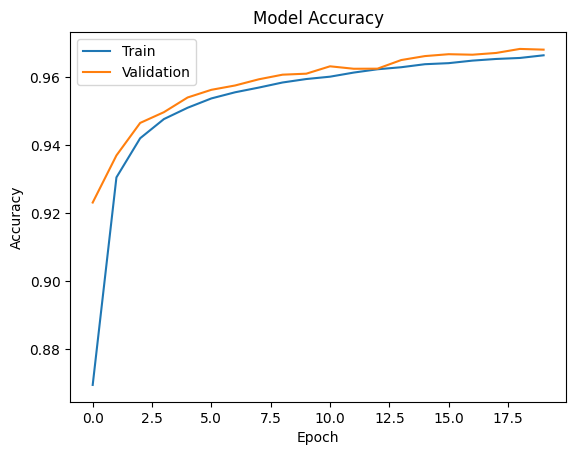

In [11]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

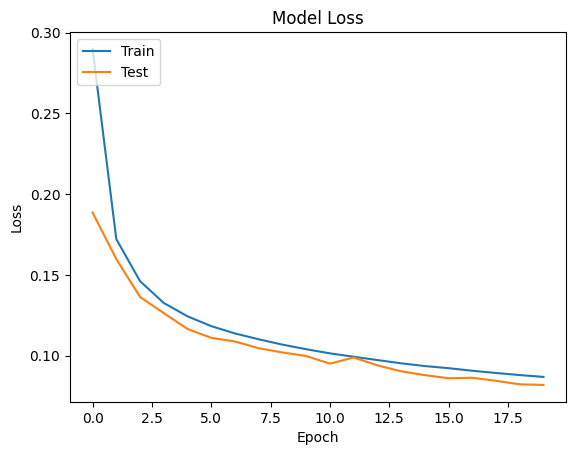

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
import numpy as np
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

labels_pred = model.predict(x_train)
labels_pred = np.round(labels_pred.flatten())
accuracy = accuracy_score(y_train, labels_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

19508/19508 [==============================] - 108s 6ms/step
Accuracy: 96.82%


In [15]:
print(classification_report(y_train, labels_pred, digits=5))

              precision    recall  f1-score   support

           0    0.97604   0.96207   0.96900    322538
           1    0.96006   0.97475   0.96735    301703

    accuracy                        0.96820    624241
   macro avg    0.96805   0.96841   0.96818    624241
weighted avg    0.96831   0.96820   0.96820    624241



In [1]:
import tensorflow as tf
import numpy as np
    
model = tf.keras.models.load_model('../../models/gender-stacked-base.h5')

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence
    
def predict_gender(name):
    name_vector = np.array(name_to_vector(name))
    padded_name_vector = tf.keras.preprocessing.sequence.pad_sequences([name_vector], maxlen=29, padding='post', truncating='post')
    prediction = model.predict(padded_name_vector)
    
    if prediction < 0.5:
        return 'Male'
    else:
        return 'Female'

nama = [
    'Novi', 
    'Novia Kumala Sari', 
    'Novianto Rahmadi', 
    'Melani', 
    'Malik', 
    'Melani Malik', 
    'Annisa', 
    'Annisa Rahmadi', 
    'Annisa Rahma Adi',
    'Putra Saputri', 
    'Putri Saputra', 
    'Rizki Saputri', 
    'Dwi Syafutra', 
]

for i in nama:
    print(i + ' = ' + predict_gender(i))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-28 10:14:36.454657: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 1s/step
Novi = Female
1/1 [==============================] - 0s 17ms/step
Novia Kumala Sari = Female
1/1 [==============================] - 0s 17ms/step
Novianto Rahmadi = Male
1/1 [==============================] - 0s 15ms/step
Melani = Female
1/1 [==============================] - 0s 15ms/step
Malik = Male
1/1 [==============================] - 0s 17ms/step
Melani Malik = Female
1/1 [==============================] - 0s 16ms/step
Annisa = Female
1/1 [==============================] - 0s 16ms/step
Annisa Rahmadi = Female
1/1 [==============================] - 0s 16ms/step
Annisa Rahma Adi = Female
1/1 [==============================] - 0s 15ms/step
Putra Saputri = Female
1/1 [==============================] - 0s 15ms/step
Putri Saputra = Female
1/1 [==============================] - 0s 15ms/step
Rizki Saputri = Female
1/1 [==============================] - 0s 16ms/step
Dwi Syafutra = Male


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-26 04:15:06.078311: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


19508/19508 [==============================] - 134s 7ms/step


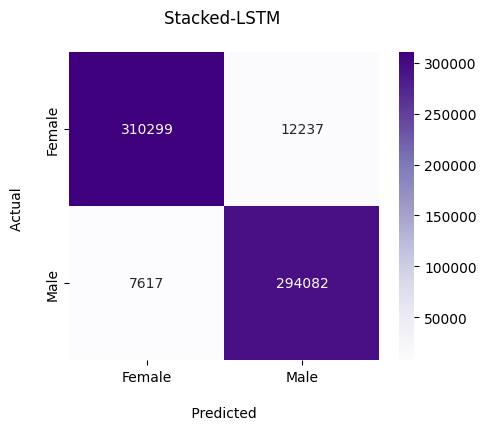

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../../data/nama-gender-titik.csv', sep=";")
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'f' else 0)
names = data[['nama', 'gender']].values.tolist()

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

x_train = np.array([name_to_vector(name[0]) for name in names])
y_train = np.array([name[1] for name in names])

model = tf.keras.models.load_model('../../models/gender-stacked-base.h5')
labels_pred = model.predict(x_train)
labels_pred = np.round(labels_pred.flatten())
cm = confusion_matrix(y_train, labels_pred)

plt.figure(figsize=(5,4))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Purples")
fx.set_title('Stacked-LSTM \n');
fx.set_xlabel('\n Predicted \n')
fx.set_ylabel('Actual \n');
fx.xaxis.set_ticklabels(['Female','Male'])
fx.yaxis.set_ticklabels(['Female','Male'])
plt.show()

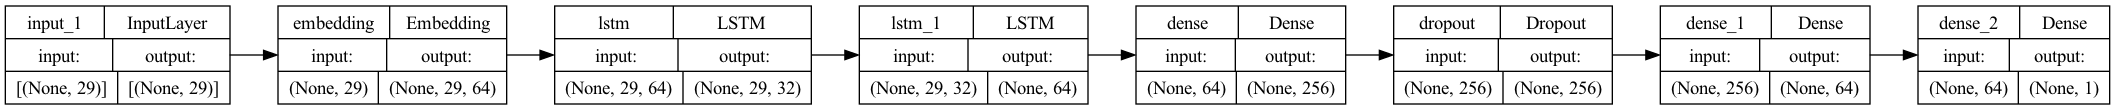

In [6]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model

model = tf.keras.models.load_model('../../models/gender-stacked-base.h5')
plot_model(model, to_file='../../assets/model-keras-stacked-horizontal.png', show_shapes=True, rankdir="LR")